# Lending Club Loan Data
These files contain complete loan data for all loans issued in 2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information.
The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter.
Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. 
The file is a matrix of about 420 thousand observations and 75 variables.
A data dictionary is provided in a separate file.

*Dataset is taken from Kaggle.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# to find current date time used to measure the time my code took
import datetime

# to supress warnings
import warnings

## Data Cleaning

In [2]:
# parse_dates option specifies which columns are to be considered as dates
df_orig = pd.read_csv('loan.csv',parse_dates=['issue_d','earliest_cr_line','next_pymnt_d','last_pymnt_d'])
df_loan = df_orig.copy()
df_loan.head()

c:\users\aviral agarwal\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000,60 months,11.99,778.38,C,C1,...,35367.0,49.3,0.0,1.0,5020.0,40.1,52200,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650,36 months,5.32,260.50,A,A1,...,24041.0,88.8,0.0,3.0,3081.0,57.9,26800,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225,36 months,14.85,146.16,C,C5,...,3830.0,21.9,0.0,0.0,367.0,22.4,4300,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000,60 months,11.99,222.40,C,C1,...,35354.0,75.5,1.0,1.0,3118.0,67.4,14200,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000,60 months,10.78,432.66,B,B4,...,10827.0,72.8,0.0,2.0,2081.0,64.7,14000,2.0,5.0,1.0


In [3]:
#gives summary with non-null counts in each column
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
id                             421094 non-null int64
member_id                      421094 non-null int64
loan_amnt                      421094 non-null int64
funded_amnt                    421094 non-null int64
funded_amnt_inv                421094 non-null int64
term                           421094 non-null object
int_rate                       421094 non-null float64
installment                    421094 non-null float64
grade                          421094 non-null object
sub_grade                      421094 non-null object
emp_title                      397220 non-null object
emp_length                     397277 non-null object
home_ownership                 421094 non-null object
annual_inc                     421094 non-null float64
verification_status            421094 non-null object
issue_d                        421094 non-null object
loan_status                

In [4]:
# checking out number of columns and rows in our data, again
print(df_loan.shape)

# checking total number of null values in each column
print(df_loan.isnull().sum())

(421094, 74)
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       23874
emp_length                      23817
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           421049
purpose                             0
title                             132
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0

**Observation**: many columns have very high null data

In [5]:
#Remvoing columns that have very high null values
#title and purpose are the same column so drop title 
#url is not important, drop that column
#remove Nas from last_pymnt_d and last_credit_pull_d
#drop zip_code because its categorical column, doing OHE -> curse of Dimensionality
to_remove=['inq_last_12m','total_cu_tl','inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m','il_util','total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m','verification_status_joint','dti_joint','annual_inc_joint','mths_since_last_major_derog','mths_since_last_record','desc','emp_title','mths_since_last_delinq','next_pymnt_d','title','member_id','url','zip_code']

# axis=1 refers column wise
df_loan = df_loan.drop(to_remove,axis=1)

In [6]:
print(df_loan.shape)
print(df_loan.columns)
print(df_loan.isnull().sum())

(421094, 47)
Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')
id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv             

**Observation**: only 3 collumns with Null values, which are very low in number wrt total number of rows. So we can simply remove rows with Null values.

In [7]:
df_loan = df_loan.dropna(how='any',axis=0) #It will erase every row (axis=0) that has "any" Null value in it.
df_loan.shape

(397107, 47)

In [8]:
#notice that on dropping NAs in tot_coll_amt also resulted in removing NAs of total_rev_hi_lim and tot_cur_bal
df_loan.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

In [9]:
# looking at count per level in columns as part of EDA
print(df_loan.application_type.value_counts())
print('---------------------------------------')
print(df_loan.home_ownership.value_counts())

INDIVIDUAL    396657
JOINT            450
Name: application_type, dtype: int64
---------------------------------------
MORTGAGE    196741
RENT        159522
OWN          40842
ANY              2
Name: home_ownership, dtype: int64


In [10]:
#we can see that most of the application types are Individual ,
# so drop Joint application types
df_loan = df_loan[df_loan.application_type != 'JOINT']

In [11]:
#now drop column application type since it only has individual 
df_loan.drop('application_type',axis=1,inplace=True)
#now drop 'ANY' level of ownership type since it has only 2 values
df_loan = df_loan[df_loan.home_ownership != 'ANY']

In [12]:
# continuing to looking at count per level in columns as part of EDA
print(df_loan.home_ownership.value_counts())
print('---------------------------------------')
print(df_loan.purpose.value_counts())

MORTGAGE    196423
RENT        159419
OWN          40813
Name: home_ownership, dtype: int64
---------------------------------------
debt_consolidation    236512
credit_card            95899
home_improvement       23428
other                  17753
major_purchase          6992
medical                 3601
car                     3274
small_business          3257
moving                  2269
vacation                2070
house                   1382
renewable_energy         213
wedding                    4
educational                1
Name: purpose, dtype: int64


In [13]:
# the following levels have low counts and hence its good to merge them in one and reduce no. of levels
# this is good for logistic regression

# creating dictionary to replace
dictr = {'educational':'other',
         'wedding':'other',
        'renewable_energy':'other',
         'house':'other',
         'vacation':'other',
         'moving':'other'
        }

In [14]:
#We can delete the levels which have less values and combine them with other.
# This will result in less columns being generated in OHE

# replaceing technique using dictionary
df_loan.purpose = df_loan.purpose.replace(dictr)

In [15]:
# continuing to looking at count per level in columns as part of EDA
print(df_loan.home_ownership.value_counts())
print('---------------------------------------')
print(df_loan.purpose.value_counts())

MORTGAGE    196423
RENT        159419
OWN          40813
Name: home_ownership, dtype: int64
---------------------------------------
debt_consolidation    236512
credit_card            95899
other                  23692
home_improvement       23428
major_purchase          6992
medical                 3601
car                     3274
small_business          3257
Name: purpose, dtype: int64


In [16]:
# continuing to looking at count per level in columns as part of EDA
print(df_loan.policy_code.value_counts())
print('---------------------------------------')
print(df_loan.initial_list_status.value_counts())
print('---------------------------------------')
print(df_loan.pymnt_plan.value_counts())

1    396655
Name: policy_code, dtype: int64
---------------------------------------
w    252605
f    144050
Name: initial_list_status, dtype: int64
---------------------------------------
n    396654
y         1
Name: pymnt_plan, dtype: int64


**Observation**: only one value in policy_code column  
only one value for 'y', rest are 'n' in initial_list_status  
These two can be dropped

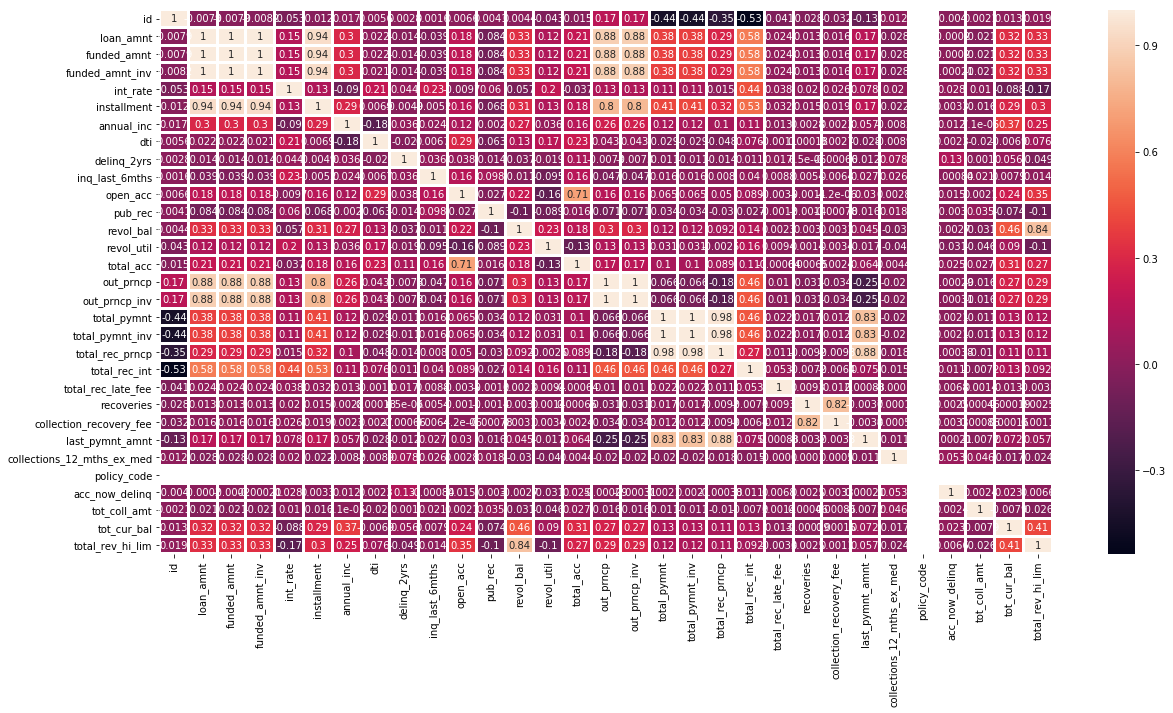

In [17]:
# Correlation between columns
#NOTE: there should be no correlation between columns as this will lead to unnecessary terms in logistic regression
# eqution.

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_loan.corr(),annot=True,linecolor='white',linewidths=2, ax=ax)
plt.show()

In [18]:
#Removing co-related columns and policy_code
#remove earliest_cr_line as it has too many levels and its not important as per description
df_loan.drop(['total_acc','total_rec_int','tot_cur_bal','policy_code','funded_amnt', 'funded_amnt_inv','installment','earliest_cr_line','pymnt_plan','collection_recovery_fee','out_prncp','total_pymnt_inv','total_rec_prncp','out_prncp_inv','last_pymnt_amnt','total_rev_hi_lim'],axis=1,inplace=True)

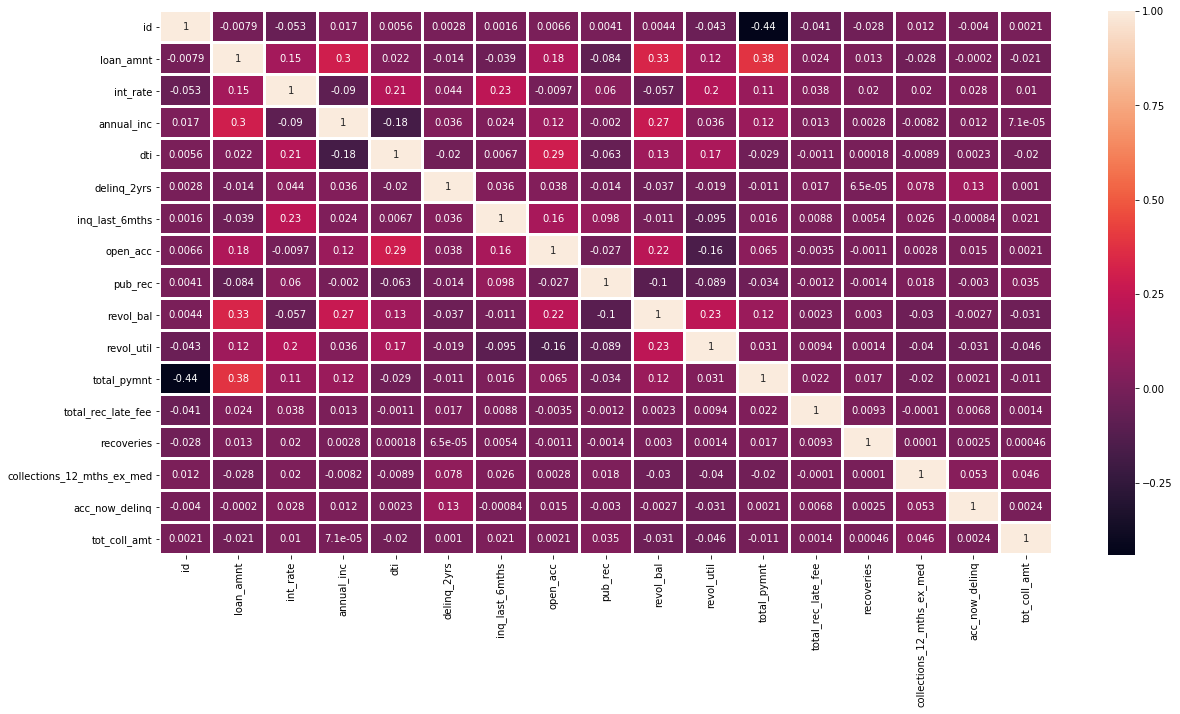

In [19]:
# again checking correlation to see if there is less correlation between columns now
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_loan.corr(),annot=True,linecolor='white',linewidths=2, ax=ax)
plt.show()

**Observation**: dark figure, low correlation, all good.

In [20]:
# looking at statistics of numerical columns for EDA
# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. 
# of a data frame or a series of numeric values.
df_loan.describe()

,id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt
count,3.966550e+05,396655.000000,396655.000000,3.966550e+05,396655.000000,396655.000000,396655.000000,396655.000000,396655.000000,3.966550e+05,396655.000000,396655.000000,396655.000000,396655.000000,396655.000000,396655.000000,396655.000000
mean,5.388898e+07,15431.064842,12.593806,7.854926e+04,19.056051,0.351636,0.572412,12.034932,0.227629,1.789018e+04,54.037271,3200.047289,0.118006,2.299801,0.020340,0.006126,253.098610
std,9.471898e+06,8584.675827,4.322284,7.529862e+04,8.617617,0.933213,0.867932,5.650858,0.645565,2.441904e+04,23.857044,4283.132118,2.110382,113.853781,0.158015,0.086780,2233.567775
min,5.670500e+04,1000.000000,5.320000,3.800000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.611596e+07,9000.000000,9.170000,4.800000e+04,12.550000,0.000000,0.000000,8.000000,0.000000,6.581000e+03,36.300000,880.470000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.529930e+07,14025.000000,12.290000,6.600000e+04,18.500000,0.000000,0.000000,11.000000,0.000000,1.215100e+04,54.400000,2004.570000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.174261e+07,20225.000000,15.590000,9.400000e+04,25.200000,0.000000,1.000000,15.000000,0.000000,2.166700e+04,72.300000,3858.350000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.861706e+07,35000.000000,28.990000,9.500000e+06,39.990000,39.000000,6.000000,90.000000,86.000000,2.904836e+06,193.000000,42786.530000,169.050000,26308.470000,14.000000,14.000000,496651.000000


In [21]:
print(df_loan.emp_length.value_counts()) 

10+ years    141294
2 years       37441
< 1 year      34281
3 years       33386
1 year        27430
5 years       24903
4 years       24469
8 years       21521
7 years       18386
6 years       16809
9 years       16735
Name: emp_length, dtype: int64


In [22]:
df_loan.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'initial_list_status', 'total_pymnt', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt'],
      dtype='object')

### Using KNN for missing emp_length Imputation

In [23]:
# taking only numerical columns as KNN works only on numercal columns
numerical_columns1 = ['loan_amnt','int_rate','emp_length','annual_inc','dti', 'delinq_2yrs','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc','total_pymnt', 'total_rec_int','total_rec_late_fee', 'recoveries','collections_12_mths_ex_med','acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']
dataset = df_loan.loc[:,numerical_columns1]

c:\users\aviral agarwal\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [24]:
#Imputing NA's of emp_length
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn import metrics as sm

test_df = dataset[dataset.emp_length == 'n/a']
dataset = dataset[dataset.emp_length != 'n/a']
train = dataset.loc[:,~dataset.columns.isin(['emp_length'])]
test = dataset.loc[:,'emp_length']

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
test_df.drop('emp_length',axis=1,inplace=True) #dropping this column as we will be imputing this

In [ ]:
print("Start of training KNN {0}".format(datetime.datetime.now()))
train_sc = scale(train)
print("End of training KNN {0}".format(datetime.datetime.now()))
#splitting data into training and test set
x_train,x_test,y_train,y_test = train_test_split(train_sc,test,test_size=0.3,random_state=25)
print("Start of Fitting KNN  {0}".format(datetime.datetime.now()))
knn = KNeighborsClassifier().fit(x_train,y_train)
print("End of Fitting KNN  {0}".format(datetime.datetime.now()))
knn

In [ ]:
print("Start of prediction KNN  {0}".format(datetime.datetime.now()))
prediction = knn.predict(x_test)
print("End of prediction KNN  {0}".format(datetime.datetime.now()))
sm.accuracy_score(y_test,prediction)

In [ ]:
print(sm.classification_report(y_test,prediction))

In [ ]:
dataset.drop(['total_acc','total_rec_int','tot_cur_bal'],axis=1,inplace=True)
train = dataset.loc[:,~dataset.columns.isin(['emp_length'])]
test = dataset.loc[:,'emp_length']
print("Start of scaling KNN {0}".format(datetime.datetime.now()))
train_sc = scale(train)
print("End of scaling KNN {0}".format(datetime.datetime.now()))
#splitting data into training and test set
x_train,x_test,y_train,y_test = train_test_split(train_sc,test,test_size=0.3,random_state=25)

In [ ]:
dataset.columns

In [ ]:
print("Start of Fitting KNN  {0}".format(datetime.datetime.now()))
knn = KNeighborsClassifier(weights='distance',n_neighbors=11).fit(x_train,y_train)
print("End of Fitting KNN  {0}".format(datetime.datetime.now()))
print("Start of prediction KNN  {0}".format(datetime.datetime.now()))
prediction = knn.predict(x_test)
print("End of prediction KNN  {0}".format(datetime.datetime.now()))
sm.accuracy_score(y_test,prediction)

In [ ]:
print("Start of Fitting KNN  {0}".format(datetime.datetime.now()))
knn = KNeighborsClassifier(weights='distance',n_neighbors=25).fit(x_train,y_train)
print("End of Fitting KNN  {0}".format(datetime.datetime.now()))
print("Start of prediction KNN  {0}".format(datetime.datetime.now()))
prediction = knn.predict(x_test)
print("End of prediction KNN  {0}".format(datetime.datetime.now()))
sm.accuracy_score(y_test,prediction)

In [ ]:
print("Start of Fitting KNN  {0}".format(datetime.datetime.now()))
knn = KNeighborsClassifier(weights='distance',n_neighbors=71).fit(x_train,y_train)
print("End of Fitting KNN  {0}".format(datetime.datetime.now()))
print("Start of prediction KNN  {0}".format(datetime.datetime.now()))
prediction = knn.predict(x_test)
print("End of prediction KNN  {0}".format(datetime.datetime.now()))
sm.accuracy_score(y_test,prediction)

**Observations of KNN**  
**We can see KNN performed really bad.**
It is a very time consuming process and it can be critical in data mining where large databases are being extracted.
In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. 
KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance.

In [23]:
df_loan_copy = df_loan.copy()

### Checking for Outliers  
for each numerical column  
by plotting boxplots  

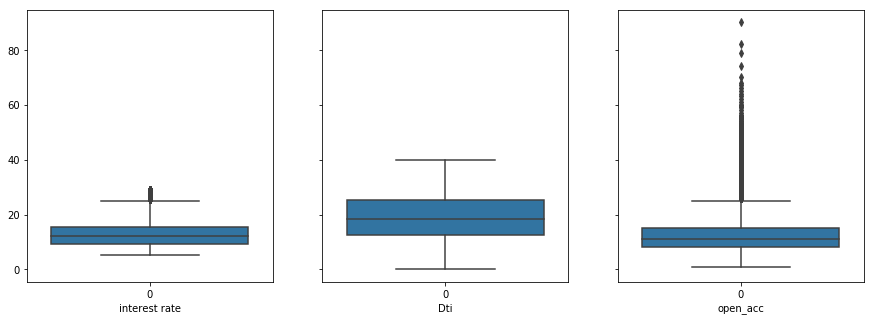

In [24]:
# creating axes, nrow=1 means there should be one row of plots, ncols=3 means there can be three plots in a row
# sharex=True all three plots share axis, 
# manual figsize to control the plot size
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)

# getting 3 separate axes from the above
ax1,ax2,ax3 = axes.flatten()

# plotting 3 boxplots
g2 = sns.boxplot(data=df_loan.int_rate,ax=ax1)
g2.set_xlabel("interest rate")
g4 = sns.boxplot(data=df_loan.dti,ax=ax2)
g4.set_xlabel("Dti")
g7 = sns.boxplot(data=df_loan.open_acc,ax=ax3)
g7.set_xlabel("open_acc")

plt.show()

**Observation**: interest_rate and open_acc have outliers

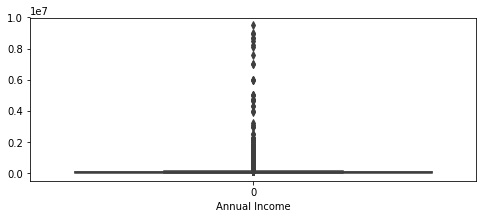

In [25]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g3 = sns.boxplot(data=df_loan.annual_inc,ax=ax1)
g3.set_xlabel("Annual Income")
plt.show()

**Observation**: lots of outliers in annual_income

Text(0.5, 0, 'loan amount')

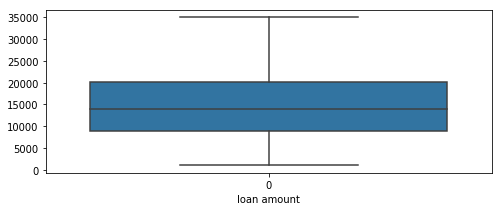

In [26]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g1 = sns.boxplot(data=df_loan.loan_amnt,ax=ax1)
g1.set_xlabel("loan amount")

Text(0.5, 0, 'delinq_2yrs')

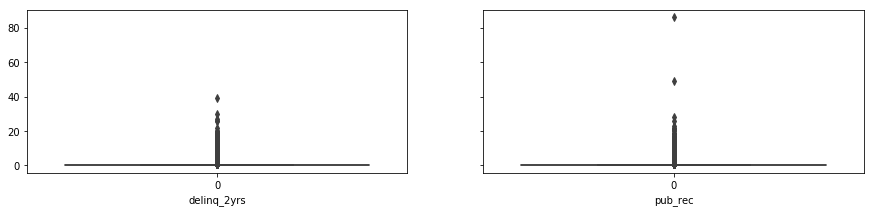

In [27]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,3),sharex=True, sharey=True)
g8 = sns.boxplot(data=df_loan.pub_rec,ax=ax2)
g8.set_xlabel("pub_rec")
g5 = sns.boxplot(data=df_loan.delinq_2yrs,ax=ax1)
g5.set_xlabel("delinq_2yrs")

Text(0.5, 0, 'Revol Bal')

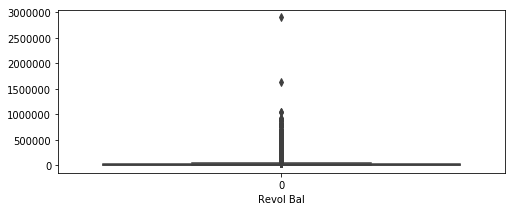

In [28]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g8 = sns.boxplot(data=df_loan.revol_bal,ax=ax1)
g8.set_xlabel("Revol Bal")

Text(0.5, 0, 'Revol Util')

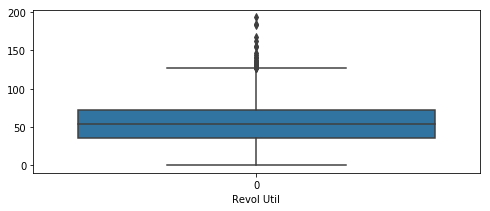

In [29]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df_loan.revol_util,ax=ax1)
g5.set_xlabel("Revol Util")

Text(0.5, 0, 'Total Payment')

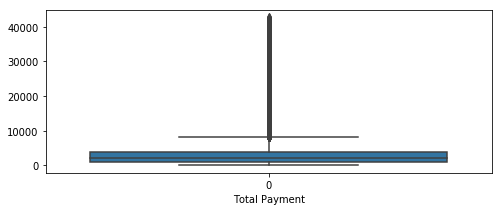

In [30]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df_loan.total_pymnt,ax=ax1)
g5.set_xlabel("Total Payment")

Text(0.5, 0, 'Total Recd Late fee')

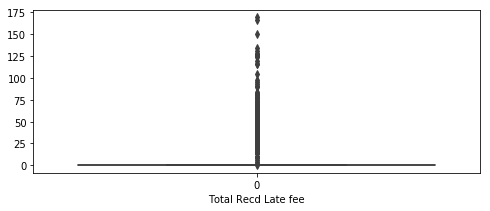

In [31]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df_loan.total_rec_late_fee,ax=ax1)
g5.set_xlabel("Total Recd Late fee")

Text(0.5, 0, 'Recoveries')

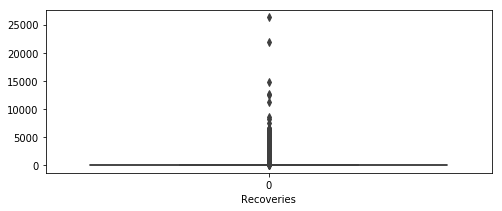

In [32]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df_loan.recoveries,ax=ax1)
g5.set_xlabel("Recoveries")

Text(0.5, 0, 'acc_now_delinq')

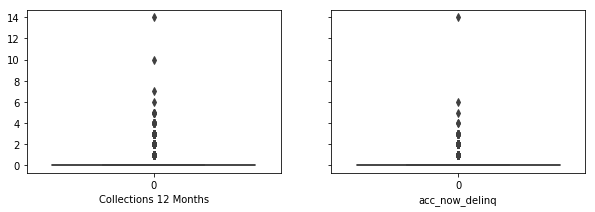

In [33]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df_loan.collections_12_mths_ex_med,ax=ax1)
g5.set_xlabel("Collections 12 Months")
g6 = sns.boxplot(data=df_loan.acc_now_delinq,ax=ax2)
g6.set_xlabel("acc_now_delinq")

Text(0.5, 0, 'tot_coll_amt')

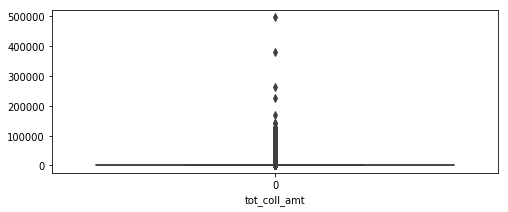

In [34]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df_loan.tot_coll_amt,ax=ax1)
g5.set_xlabel("tot_coll_amt")

### Finding Outliers  
outliers if more than Q3+1.5IQR or less than Q1-1.5IQR where IQR=Q3-Q1

In [35]:
#Calculating percentage of outliers

# Q1= 1st quartile or has 25% of total data
Q1 = df_loan.quantile(0.25)

# Q3= 3rd quartile or has 75% of total data
Q3 = df_loan.quantile(0.75)

# IQR= inter quartile range
IQR = Q3 - Q1

# gives numerical columns
print(IQR.keys())

# gives IQR values of each numerical column
IQR.values

Index(['id', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_pymnt', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt'],
      dtype='object')


array([1.5626651e+07, 1.1225000e+04, 6.4200000e+00, 4.6000000e+04,
       1.2650000e+01, 0.0000000e+00, 1.0000000e+00, 7.0000000e+00,
       0.0000000e+00, 1.5086000e+04, 3.6000000e+01, 2.9778800e+03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00])

In [36]:
# creating an empty dataframe which will hold column name and percentage of outliers in them
df_outlier_pct = pd.DataFrame(columns=['Colname','Pct'],data=None)

In [37]:
#Calculating percentage of Outliers in each Column
loc = 0
for col in IQR.keys():
    outlier_cnt = ((df_loan[col] < (Q1[col] - 1.5 * IQR[col])) | (df_loan[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    df_outlier_pct.loc[loc,'Colname'] = col
    df_outlier_pct.loc[loc,'Pct'] = (outlier_cnt*100)/len(df_loan[col])
    loc+=1

In [38]:
print("Outlier Percentage in the Dataset")
#df_outlier_pct.sort_values(by='Pct', ascending=False)
df_outlier_pct

Outlier Percentage in the Dataset


,Colname,Pct
0,id,0.226645
1,loan_amnt,0
2,int_rate,0.77725
3,annual_inc,4.64963
4,dti,0
5,delinq_2yrs,20.9018
6,inq_last_6mths,4.05113
7,open_acc,2.64487
8,pub_rec,17.1701
9,revol_bal,5.96009


**Observataion**:  
We can see columns like delinq_2yrs, tot_coll_amt and pub_rec have more than 5% of outliers   
hence we cannot delete outliers from these columns- we will cap them  
for others we can delete the rows containing the outliers since percentage is less than 5%  

In [39]:
#Remove ID since we dont want to remove rows of id column- ID is just a serial number column
df_outlier_pct.drop(df_outlier_pct.head(1).index, inplace=True)

In [40]:
df_outlier_pct

,Colname,Pct
1,loan_amnt,0
2,int_rate,0.77725
3,annual_inc,4.64963
4,dti,0
5,delinq_2yrs,20.9018
6,inq_last_6mths,4.05113
7,open_acc,2.64487
8,pub_rec,17.1701
9,revol_bal,5.96009
10,revol_util,0.00857168


In [41]:
df_loan_copy2 = df_loan.copy()

In [42]:
# checking value_counts of numerical data for EDA purposes
print(df_loan.collections_12_mths_ex_med.value_counts())
print(df_loan.tot_coll_amt.value_counts())
print(df_loan.acc_now_delinq.value_counts())
print(df_loan.total_pymnt.value_counts())
print(df_loan.total_rec_late_fee.value_counts())
print(df_loan.pub_rec.value_counts())
print(df_loan.open_acc.value_counts())
print(df_loan.inq_last_6mths.value_counts())
print(df_loan.delinq_2yrs.value_counts())

0     389301
1       6783
2        480
3         66
4         15
5          6
14         1
10         1
7          1
6          1
Name: collections_12_mths_ex_med, dtype: int64
0        334201
50          869
100         674
75          499
200         387
150         381
60          355
70          323
80          302
250         260
65          254
55          240
90          231
85          226
125         203
300         197
67          197
95          196
99          190
66          189
61          189
79          188
51          186
56          185
64          183
96          182
78          181
120         179
63          178
71          177
          ...  
6261          1
5350          1
20604         1
4468          1
39525         1
4724          1
2679          1
7029          1
9440          1
25466         1
22143         1
23678         1
32379         1
25721         1
6006          1
8055          1
10352         1
12403         1
14306         1
6262          1
28795  

In [43]:

df_loan.recoveries.value_counts()

0.00       396373
1053.50         2
1000.00         2
1534.41         1
74.16           1
4988.30         1
3803.56         1
6211.27         1
3077.24         1
3665.20         1
2176.12         1
542.84          1
5776.89         1
3896.31         1
1065.30         1
4280.05         1
4236.70         1
2746.67         1
1998.85         1
4128.70         1
2506.87         1
1223.20         1
1026.05         1
157.46          1
1602.76         1
2098.90         1
5508.34         1
1350.00         1
2879.18         1
1304.54         1
            ...  
621.99          1
892.48          1
6182.61         1
1889.82         1
5406.77         1
2013.05         1
1595.16         1
1731.21         1
3169.93         1
2820.97         1
222.50          1
3564.00         1
3827.89         1
102.26          1
1487.61         1
2228.69         1
328.72          1
4053.15         1
5891.31         1
519.70          1
2406.29         1
5978.94         1
2077.70         1
1079.85         1
1167.73   

#### Inference 
We can see that columns like collections_12_mths_ex_med,tot_coll_amt,acc_now_delinq,total_pymnt,total_rec_late_fee,recoveries 
have most of the values 0. So deleting these columns wont make an impact as such. We will delete these columns


In [44]:
### Deleting the columns
df_loan.drop(['collections_12_mths_ex_med','tot_coll_amt','acc_now_delinq','total_pymnt','total_rec_late_fee','recoveries'],axis=1,inplace=True)

In [45]:
print(df_loan.pub_rec.value_counts())
print(df_loan.open_acc.value_counts())
print(df_loan.inq_last_6mths.value_counts())
print(df_loan.delinq_2yrs.value_counts())

0     328549
1      55036
2       8474
3       2655
4        971
5        443
6        227
7        103
8         78
9         31
10        26
12        14
11        14
13        10
15         4
16         4
21         3
17         2
18         2
49         1
14         1
19         1
20         1
22         1
23         1
26         1
28         1
86         1
Name: pub_rec, dtype: int64
9     33966
10    33660
8     32367
11    31330
12    28529
7     28116
13    25541
6     23180
14    21990
15    18649
5     16653
16    15773
17    13295
18    10983
4      9742
19     9239
20     7493
21     6102
22     5037
23     4008
3      3626
24     3296
25     2672
26     2008
27     1689
28     1320
29     1099
2       849
30      814
31      665
      ...  
44       33
46       31
45       28
48       26
47       24
49       14
51       12
52       11
53       11
50        8
55        6
56        6
54        3
59        2
60        2
74        1
68        1
70        1
82        1
79      

#### Inference
1. Not removing outliers from inq_last_6mths (has values from 0-6 and it makes sense to have them)
2. Not removing outliers from delinq_2yrs (has values from 0-39), we can however update row with delinq_2yrs = 39,30 with 27(flooring/capping).
3. Not deleting rows since this is an important column in finding a default customer and we dont want to lose this imp. data    Note only 2 rows will be updated
4. We will update open_acc values with greater than 50 = 50 since there are only 24 values with greater than 50 
5. We will udpate pub_rec =86 with 28 since others are in the range 0-28. 

In [46]:
df_loan.delinq_2yrs[df_loan.delinq_2yrs >29] = 27

c:\users\aviral agarwal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_loan.open_acc[df_loan.open_acc >50] = 50
df_loan.pub_rec[df_loan.pub_rec > 28] = 28

c:\users\aviral agarwal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\aviral agarwal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Capping Outliers of annual_income, int_rate, revol_util and revol_bal

In [48]:
#capping outliers
# outliers are those lower than 5 percentile and are set to 5 percentile value
# outliers are those above than 95 percentile and are set to 95 percentile value
out_cols = ['int_rate','annual_inc','revol_bal','revol_util']
for col in out_cols:
    percentiles = df_loan[col].quantile([0.05,0.95]).values
    df_loan[col][df_loan[col] <= percentiles[0]] = percentiles[0]
    df_loan[col][df_loan[col] >= percentiles[1]] = percentiles[1]

c:\users\aviral agarwal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\aviral agarwal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\aviral agarwal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\av

# plotting boxplots after outlier treatment

Text(0.5, 0, 'Revol Util')

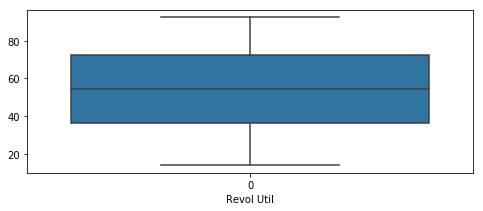

In [49]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df_loan.revol_util,ax=ax1)
g5.set_xlabel("Revol Util")

Text(0.5, 0, 'Revol Bal')

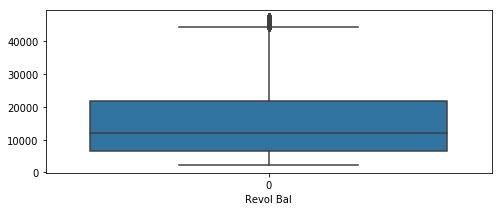

In [50]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g8 = sns.boxplot(data=df_loan.revol_bal,ax=ax1)
g8.set_xlabel("Revol Bal")

Text(0.5, 0, 'delinq_2yrs')

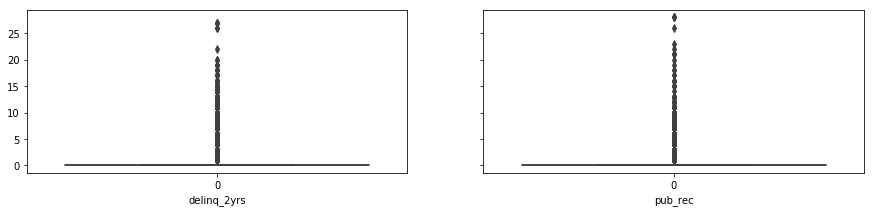

In [51]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,3),sharex=True, sharey=True)
g8 = sns.boxplot(data=df_loan.pub_rec,ax=ax2)
g8.set_xlabel("pub_rec")
g5 = sns.boxplot(data=df_loan.delinq_2yrs,ax=ax1)
g5.set_xlabel("delinq_2yrs")

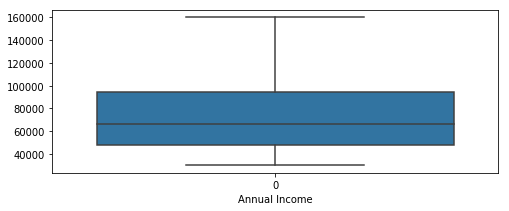

In [52]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g3 = sns.boxplot(data=df_loan.annual_inc,ax=ax1)
g3.set_xlabel("Annual Income")
plt.show()

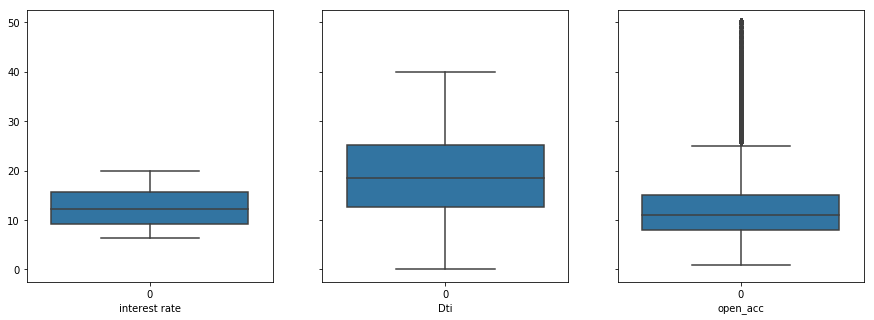

In [53]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df_loan.int_rate,ax=ax1)
g2.set_xlabel("interest rate")
g4 = sns.boxplot(data=df_loan.dti,ax=ax2)
g4.set_xlabel("Dti")
g7 = sns.boxplot(data=df_loan.open_acc,ax=ax3)
g7.set_xlabel("open_acc")

plt.show()

Text(0.5, 0, 'loan amount')

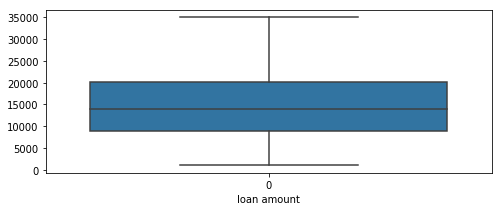

In [54]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g1 = sns.boxplot(data=df_loan.loan_amnt,ax=ax1)
g1.set_xlabel("loan amount")

In [55]:
# Saving this file for backup
df_loan.to_csv('df2_out.csv',index=False)

### Loan status description
1. Fully Paid: Loan has been fully repaid, either at the expiration of the 3 or 5 year term or as a result of a repayment.
2. Current: Loan is up to date on all outstanding payments.
3. Does not meet the credit policy. Status:Fully Paid: No explanation but see “fully paid”.
4. Issued: New loan that has passed all Lending Club reviews, received full funding, and has been issued.
5. Charged Off: Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance. Learn more about the difference between default and charged off.
6. Does not meet the credit policy. Status:Charged Off: No explanation but see “Charged Off”
7. Late (31-120 days): Loan has not been current for 31 to 120 days.
8. In Grace Period: Loan is past due but within the 15-day grace period.
9. Late (16-30 days): Loan has not been current for 16 to 30 days.
10. Default: Loan has not been current for 121 days or more.

In [56]:
# creating a new column default
# we are going to use Logistic Regression, which is used for Binary Classification
# so we are converting the column to have only Yes and No values uising our business domain

# we are putting the loan status of 'current' and not defaulting. The reasoning behind this is that,
# even from the data, we see that loan defaulters are very lessa (around 2.5%) of the total data.
# Given this logic, we can assume similar no. of defaulters from 'current' loan status i.e. very less.
# since we do want to remove records with 'current' loan status as their no. is high, we are classifying them
# as not defaulting.

dict_default_mapping = {'In Grace Period':'Yes',
                       'Late (16-30 days)':'Yes',
                       'Late (31-120 days)':'Yes',
                       'Charged Off':'Yes',
                        'Default':'Yes',
                       'Issued':'No',
                       'Current':'No',
                       'Fully Paid':'No'}



df_loan['default'] = df_loan['loan_status'].replace(dict_default_mapping)
df_loan.columns
df_loan['default'] = df_loan['default'].astype('category')

In [57]:
# checking the proportion of Yes and No in our dependable variable
df_loan['default'].value_counts()

No     385322
Yes     11333
Name: default, dtype: int64

**Observation**: proportion of No is quite high than Yes. Point to be careful about while building the model.

## Exploratory Data Analysis

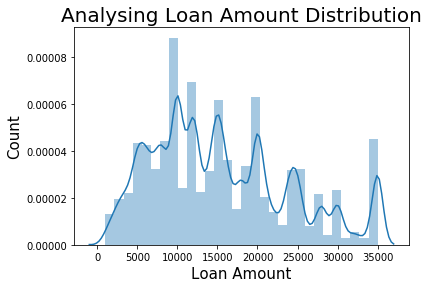

In [58]:
#distribution of loan amount
g = sns.distplot(df_loan['loan_amnt'],bins=30)
g.set_xlabel("Loan Amount", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Analysing Loan Amount Distribution", fontsize=20)
g

#### Inference
We can see there are peaks at series of 5000 and that makes sense since we normally apply for loan in multiples of 5000

In [59]:
pd.crosstab(df_loan['default'], df_loan['grade'])

grade,A,B,C,D,E,F,G
default,,,,,,,
No,68948,109248,110345,55623,30968,8400,1790
Yes,492,1634,3191,2801,2052,898,265


#### Inference
We can see that as the grade increases the chances of being a default increases.

Text(0.5, 1.0, 'Distribution of default by Purpose')

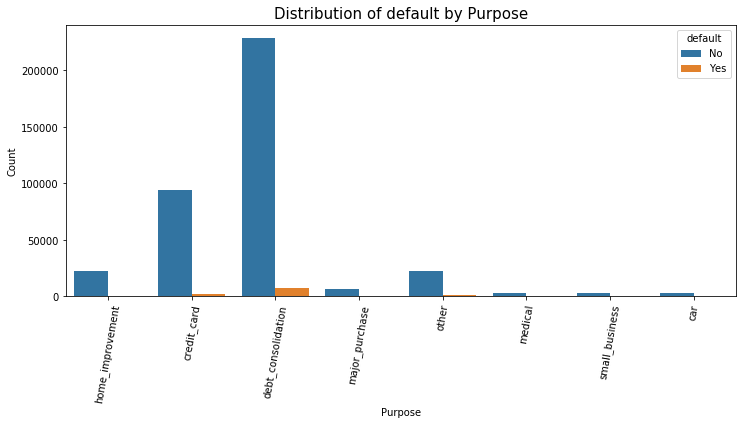

In [60]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
g = sns.countplot('purpose',data=df_loan,hue='default')
g.set_xticklabels(g.get_xticklabels(),rotation=80)
g.set_xlabel("Purpose")
g.set_ylabel("Count")
g.set_title("Distribution of default by Purpose",fontsize=15)

#### Inference
We can see that most of the defaulters are belonging to debt_consolidadtion category.

[]

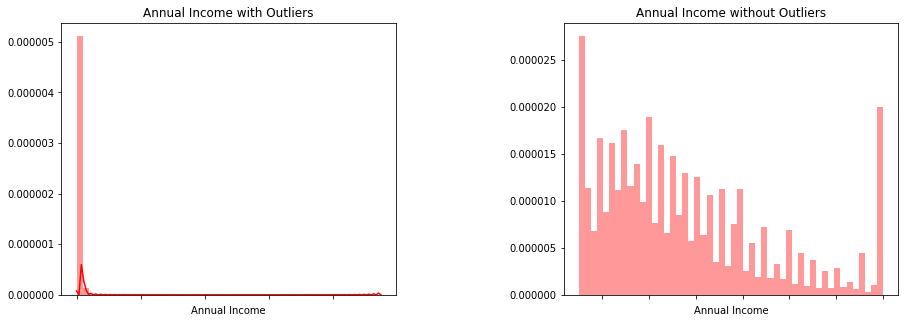

In [61]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(wspace=0.5)

g1 = sns.distplot(df_loan_copy2['annual_inc'],ax=ax1,color='red')
g1.set_xlabel('Annual Income')
g1.set_title('Annual Income with Outliers')
g1.set_xticklabels("")

g2 = sns.distplot(df_loan['annual_inc'],ax=ax2,norm_hist=True,kde=False,color='red')
g2.set_xlabel('Annual Income')
g2.set_title('Annual Income without Outliers')
g2.set_xticklabels("")

Text(0.5, 1.0, 'Loan Status Count')

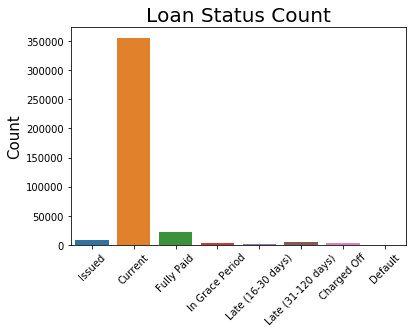

In [62]:
g = sns.countplot(x="loan_status", data=df_loan)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)

#### Inference
We can see that the number of default loans are very less.
This dataset is skewed and hence sampling techiques need to be applied

Text(0.5, 1.0, 'Employeement length Count')

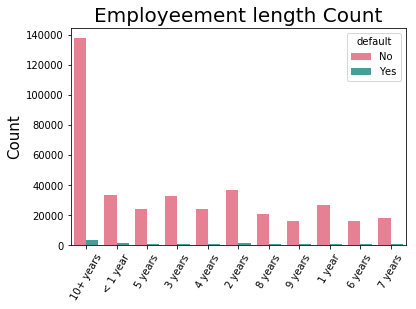

In [63]:
g = sns.countplot(x="emp_length", data=df_loan,palette='husl',hue='default')
g.set_xticklabels(g.get_xticklabels(),rotation=60)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Employeement length Count", fontsize=20)

Text(0.5, 1.0, 'Default')

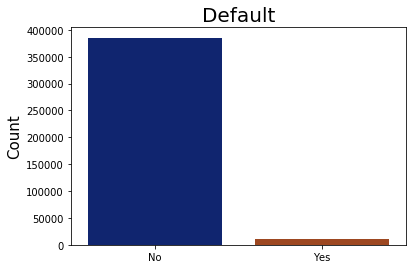

In [64]:
import seaborn as sns
%matplotlib inline
g = sns.countplot(x="default",data=df_loan,palette='dark')
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title('Default',fontsize=20)

In [65]:
df_loan.groupby('default').mean()

,id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util
default,,,,,,,,,,,
No,5.407064e+07,15419.665241,12.403746,74774.995297,19.010041,0.349030,0.565994,12.040060,0.227059,15969.254862,54.064514
Yes,4.771247e+07,15818.651284,15.287169,70700.140127,20.620386,0.438895,0.790611,11.820083,0.240007,14504.182555,57.080958


**Observation**  
The average int_rate of customers who were default is more than that of who were not default
The average annual income of customers who were default is lower than that who were not default
The average number of inquires for default customers is comparitively more than that of non default
The average revolving utilization of defaulters is more compared to non defaulters 


In [66]:
df_loan.groupby('emp_length').mean()

,id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util
emp_length,,,,,,,,,,,
1 year,5.402112e+07,14343.690303,12.574295,69758.294039,18.658418,0.359898,0.572840,11.784725,0.194276,14144.950667,53.655086
10+ years,5.394736e+07,16445.252629,12.399011,79478.408420,19.374253,0.391715,0.570767,12.312844,0.241709,18055.595807,55.081573
2 years,5.379600e+07,14603.644401,12.520082,71359.162974,18.646819,0.367191,0.571432,11.825646,0.203814,14201.997994,53.102281
3 years,5.389829e+07,14710.911011,12.503719,71632.656150,18.733059,0.323489,0.581711,11.850027,0.214701,14364.936575,53.288312
4 years,5.384299e+07,14893.161756,12.545539,72641.401179,18.975865,0.299440,0.588050,11.918100,0.231967,14561.310025,53.276321
5 years,5.407511e+07,14983.646549,12.497221,72832.151872,18.976231,0.310324,0.568727,11.841264,0.245794,14755.829904,52.871361
6 years,5.367001e+07,15283.974359,12.561867,73515.836038,19.125535,0.321316,0.577786,11.960676,0.244155,15155.143429,53.608371
7 years,5.289793e+07,15231.355379,12.591154,73190.926120,19.279436,0.309638,0.564016,11.975851,0.239639,15390.543767,54.192233
8 years,5.397042e+07,15443.738674,12.515832,74197.842485,19.248535,0.322104,0.582965,12.049719,0.243623,15644.075856,53.828767


In [67]:
pd.crosstab(df_loan.emp_length,df_loan.default)

default,No,Yes
emp_length,,
1 year,26524,906
10+ years,137751,3543
2 years,36345,1096
3 years,32383,1003
4 years,23693,776
5 years,24176,727
6 years,16283,526
7 years,17821,565
8 years,20943,578


### Some more data preparation

In [68]:
# creating a new column default to make it a binary classification problem
dict_default_mapping = {'In Grace Period':'Yes',
                       'Late (16-30 days)':'Yes',
                       'Late (31-120 days)':'Yes',
                       'Charged Off':'Yes',
                        'Default':'Yes',
                       'Issued':'No',
                       'Current':'No',
                       'Fully Paid':'No'}



df_loan['default'] = df_loan['loan_status'].replace(dict_default_mapping)
df_loan.columns
df_loan['default'] = df_loan['default'].astype('category')
df_loan['default'].value_counts()

No     385322
Yes     11333
Name: default, dtype: int64

In [69]:
df_loan_copy3 = df_loan.copy()

In [70]:
# dropping date columns because we are not using them
# also, Removing addr since it will create many dummy columns in One Hot Encoding and not much information
df_loan.drop(['last_pymnt_d','last_credit_pull_d','issue_d','loan_status','addr_state'],axis=1,inplace=True)
df_loan.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'initial_list_status', 'default'],
      dtype='object')

In [71]:
# preparing the target variable for Logistic Regression
print('Data Type of target variable "default" before: ',df_loan.default.dtype) 

#To change category you need to convert it to str first
df_loan.default = df_loan.default.astype(str)

# for logistic regression, the class of interest should be 1 and the other 0
# here we want know whether the customer will default
df_loan['default'] = df_loan['default'].replace({'No':'0','Yes':'1'})

# changing the type back to int as we now have 1 and 0 and we are going to use Logistic Regression.
df_loan.default = df_loan.default.astype(int)

print('Data Type of target variable "default" after: ',df_loan.default.dtype) 

Data Type of target variable "default" before:  category
Data Type of target variable "default" after:  int32


In [72]:
# separating independent features and target/dependent variable

# independent features
x = df_loan.iloc[:,:-1]

# target variable
y = df_loan.iloc[:,-1]

#### Some *EDA* wrt newly created target variable *default*

In [73]:
print(df_loan.default.value_counts())
print(df_loan.default.dtypes)

0    385322
1     11333
Name: default, dtype: int64
int32


**Inference**: data is highly skewed as the proportion of defaulters is very less.

In [74]:
pd.crosstab(df_loan.initial_list_status,df_loan.default)

default,0,1
initial_list_status,,
f,138359,5691
w,246963,5642


In [75]:
pd.crosstab(df_loan.verification_status,df_loan.default)

default,0,1
verification_status,,
Not Verified,112069,2369
Source Verified,170126,5154
Verified,103127,3810


### Using Dummy Variable for One Hot Encoding(OHE)  
Logistic Regression cannot process categorical columns.   
To be used in logistic regression, we need to encode it to numerical data type.  
One Hot Encoding is one such encoding method.

In [76]:
# creating Train Data with Dummy variables usig pandas.get_duummies
X_dummy = pd.get_dummies(x,drop_first=True,prefix_sep='_')
X_dummy.columns

Index(['id', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp

In [77]:
X_dummy.shape

(396655, 74)

### Handling Skewed Data

1. Stratified cross validation to make sure you end up with enough positives in the test.
2. Under/over sampling as others have mentioned or roughly balanced bagging for random forests. 
   There are also methods for generating new minority class samples and sampling representative majority class samples.
3. Class weighted or cost sensitive learning can work well and there are versions of many methods that can do this (though not      in scikit learn).
4. Boosting (gradient or adaptive) can work well.

**Implementing SMOTE for over sampling**   
Synthetic Minority Oversampling Technique (SMOTE)  
SMOTE is technique to oversample to form training data from original data. This is useful to handle skewed data as we have in this case.  
It works by creating artificial/synthetic data for the minority class.  
This does not create duplicate of the data.

In [78]:
# splitting to train and test normally
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3, random_state=0)

In [79]:
# Oversampling using SMOTE

from imblearn.over_sampling import SMOTE
# random_state=0 is like seed in R, ensures same randomness while executing repetedly
os = SMOTE(random_state=0)

# making the proportion of majority and minority class as 50:50
os_data_X,os_data_y = os.fit_sample(X_train, y_train)

print("length of oversampled data is ",len(os_data_X))

# no. of counts per level
np.bincount(os_data_y)

length of oversampled data is  539284


array([269642, 269642], dtype=int64)

## Feature Selection

**1. Recursive Feature Elimination (RFE)**  
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [72]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # To supress warnings 

# default Logistic Regression Model to be used in RFE
logr_model = LogisticRegression()

print("Start of RFE {0}".format(datetime.datetime.now()))

rfe = RFE(logr_model,50)
rfe.fit(os_data_X,os_data_y)

print("End of RFE {0}".format(datetime.datetime.now()))

print(rfe.support_)
print(rfe.ranking_)

Start of RFE 2019-05-11 10:36:47.241357
End of RFE 2019-05-11 10:38:54.985573
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True False False False False False
 False False False False False  True  True  True False False False False
 False  True  True  True  True  True  True  True False False False  True
 False  True]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  7 22 17 25 10  1  1  1  1  1  1  1  1  1  1  1  1  2  3  6  8 15
 14 18 24 20  4  1  1  1  9  5 11 21 16  1  1  1  1  1  1  1 23 13 19  1
 12  1]


In [80]:

print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: x, rfe.ranking_), X_train.columns)))

Features sorted by their rank:
[(1, 'annual_inc'), (1, 'delinq_2yrs'), (1, 'dti'), (1, 'emp_length_2 years'), (1, 'emp_length_3 years'), (1, 'emp_length_4 years'), (1, 'emp_length_< 1 year'), (1, 'grade_B'), (1, 'grade_C'), (1, 'grade_D'), (1, 'grade_E'), (1, 'grade_F'), (1, 'grade_G'), (1, 'home_ownership_OWN'), (1, 'home_ownership_RENT'), (1, 'id'), (1, 'initial_list_status_w'), (1, 'inq_last_6mths'), (1, 'int_rate'), (1, 'loan_amnt'), (1, 'open_acc'), (1, 'pub_rec'), (1, 'purpose_credit_card'), (1, 'purpose_debt_consolidation'), (1, 'purpose_other'), (1, 'revol_bal'), (1, 'revol_util'), (1, 'sub_grade_A2'), (1, 'sub_grade_A3'), (1, 'sub_grade_A4'), (1, 'sub_grade_A5'), (1, 'sub_grade_B1'), (1, 'sub_grade_B2'), (1, 'sub_grade_B3'), (1, 'sub_grade_B4'), (1, 'sub_grade_C5'), (1, 'sub_grade_D1'), (1, 'sub_grade_D2'), (1, 'sub_grade_D3'), (1, 'sub_grade_D4'), (1, 'sub_grade_D5'), (1, 'sub_grade_E1'), (1, 'sub_grade_E2'), (1, 'sub_grade_E3'), (1, 'sub_grade_E4'), (1, 'sub_grade_E5'), (1, 

#### Inference 
We can see aannual_inc,delinq_2yrs,dti,emp_length,grade,home_ownership,initial_list_status,inq_last_6mths,int_rate,loan_amnt,
open_acc,pub_rec,purpose,revol_bal,sub_grade,term,verification_status were highly important by the model  
Subgrades are not so important or can be eliminated if required because their information is given by grades column and sub_grade has high number of levels too.

**Data Preparation after Feature Selection**

In [80]:
# dropping sub_grade as per results of RFE and also because sub_grade has lots of categorical levels 
# due to which lots of dummy variables were created

# id is just a unique identifier
x_filtered = x.drop(['sub_grade','id'],axis=1)

In [81]:
# since grade is an ordinal variable such that A is the best and G is the worst
# so A is given the heighest weight and G the lowest
# this results in no dummy variable getting created for feature grade
grade_mapping={'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}
x_filtered["grade"] = x_filtered["grade"].replace(grade_mapping)

In [82]:
x = x_filtered

**Observation**: In testing, it was observed after dropping sub_grade and id columns and converting grade to numeric, the AUC-ROC has increased.

**FINAL DATA**

In [93]:
print('No. of rows in final data: ',len(x))

No. of rows in final data:  396655


In [83]:
# again creating data with One Hot Encoding because we dropped the above columns and we do not want their
# dummy variables
X_dummy = pd.get_dummies(x,drop_first=True,prefix_sep='_')
X_dummy.columns

# again creating train and test data using SMOTE oversampling
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3, random_state=0)

os = SMOTE(random_state=0)
os_data_X,os_data_y = os.fit_sample(X_train, y_train)

print("length of oversampled data is ",len(os_data_X))

# no. of counts per level
np.bincount(os_data_y)

length of oversampled data is  539284


array([269642, 269642], dtype=int64)

# Model Implementation 

## Logistic Regression  
**Logistic Regression Assumptions**  
Binary logistic regression requires the dependent variable to be binary.  
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.  
Only the meaningful variables should be included.  
The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.  
The independent variables are linearly related to the log odds.  
Logistic regression requires quite large sample sizes.  

**Options of sklearn.linear_model.LogisticRegression**:     


**C**: inverse of regularization 1/lambda  

**class_weight**: dictionary for penalty for each class, by default 1 for each class  
**n_jobs** = for parallel processing -1 for using all cores of our CPU   
**tol or tolerance** = in gradient descent, the tolerance we have for slope = 0  
**max_iter** = iterations for gradient descent  
**solver**=different techniques for optimization like gradient descent, Newton converges faster on larger datasets and multiclass, default is liblinear  
**verbose**: =0 means logs are not printed =1 mean logs are written  
**warm_start** = True when we are changing the solver, false by default  

In [87]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

### Logistic Regression with default options and on normally split train and test data i.e. not oversampled

In [86]:
X_test.shape

(118997, 34)

In [87]:
# Building Logistic Model as it is after splitting into train and test data, without oversampling
logr = LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
# prediction using the model
pred = logr.predict(X_test)

# accuracy of normal logistic model 
print('Accuracy: ',metrics.accuracy_score(y_test,pred))

Accuracy:  0.9721253476978411


**Observation**: it is as expected as the data is very skewed. So if the model simply classifies the result as the majority class, then also the accuracy is very high.   
*hence accuracy is not a correct measure for performance for skewed data*

In [89]:
print('Classification Report \n',metrics.classification_report(y_test,pred))
print('AUC-ROC Score: ', roc_auc_score(y_test,pred))

Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    115680
           1       0.00      0.00      0.00      3317

   micro avg       0.97      0.97      0.97    118997
   macro avg       0.49      0.50      0.49    118997
weighted avg       0.95      0.97      0.96    118997

AUC-ROC Score:  0.5


c:\users\aviral agarwal\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\aviral agarwal\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\aviral agarwal\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Observation**: as you can see, the precision and recall for class 0 is good, but zero for class 1. Another proof of the data being skewed.

### Class Weights using Logistic Regression and on normally split train and test data i.e. not oversampled

In [90]:
# Logistic Regression with modified class weights.
# here we are penalizing wrong prediction for class 1, 25 times more than that for wrong prediction of class 0.
logr = LogisticRegression(class_weight={1:25}).fit(X_train,y_train)
pred = logr.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,pred))
print('Classification Report \n',metrics.classification_report(y_test,pred))
print('AUC-ROC Score: ', roc_auc_score(y_test,pred))

Accuracy:  0.763195710816239
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.77      0.86    115680
           1       0.06      0.53      0.11      3317

   micro avg       0.76      0.76      0.76    118997
   macro avg       0.52      0.65      0.49    118997
weighted avg       0.96      0.76      0.84    118997

AUC-ROC Score:  0.6481827135536744


**Observation**: as we can see, recall and f1-score have increased but still not a useful model. This effect comes only because we penalized the model 25 times more if it classifies the minority class (in this case 1) wrongly.

### Logistic Regression with default options and on oversampled split train and test data

In [91]:
# did not give class weights as we have same porportion of minority and majority class
logreg = LogisticRegression(random_state=7)
logreg.fit(os_data_X, os_data_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [92]:
y_pred = logreg.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('Classification Report \n',metrics.classification_report(y_test,y_pred))
print('AUC-ROC Score: ', roc_auc_score(y_test,y_pred))

Accuracy:  0.6768069783271847
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.68      0.80    115680
           1       0.05      0.63      0.10      3317

   micro avg       0.68      0.68      0.68    118997
   macro avg       0.52      0.66      0.45    118997
weighted avg       0.96      0.68      0.78    118997

AUC-ROC Score:  0.6561668487831036


**Observation**: the *accuracy* decreased but *recall* increased due to oversampling. Better Bias-Variance tradeoff.

In [93]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n',confusion_matrix)

Confusion Matrix 
 [[78434 37246]
 [ 1213  2104]]


In [94]:
#Just checking if we have not included any redundant columns 
columns = X_train.columns
os_data_X_df = pd.DataFrame(data=os_data_X,columns=columns)
os_data_X_df.columns

Index(['loan_amnt', 'int_rate', 'grade', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'term_ 60 months', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_medical', 'purpose_other',
       'purpose_small_business', 'initial_list_status_w'],
      dtype='object')

### Logistic Regression with default options and on oversampled split train and test data and with Regularization

In [95]:
# C=0.01 i.e. regularization
logreg_1 = LogisticRegression(random_state=7,C=0.01)
logreg_1.fit(os_data_X, os_data_y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
y_pred1 = logreg_1.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred1))
print('Classification Report \n',metrics.classification_report(y_test,y_pred1))
print('AUC-ROC Score: ', roc_auc_score(y_test,y_pred1))

Accuracy:  0.6767061354487929
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.68      0.80    115680
           1       0.05      0.64      0.10      3317

   micro avg       0.68      0.68      0.68    118997
   macro avg       0.52      0.66      0.45    118997
weighted avg       0.96      0.68      0.78    118997

AUC-ROC Score:  0.656700646966818


**Observation**: better recall.

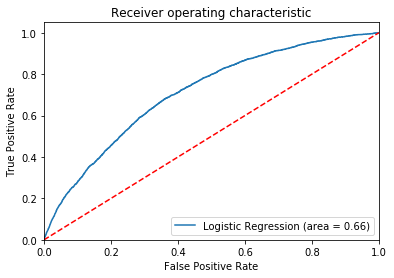

In [97]:
%matplotlib inline
# plotting roc curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test,y_pred1))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

### Trying to improve performance using C parameter or Regularization
C_param_range = [0.001,0.01,0.1,1,10,100,1000]  

The trade-off parameter of logistic regression that determines the strength of the regularization is called C, and higher values of C correspond to less regularization (where we can specify the regularization function). C is actually the Inverse of regularization strength(lambda).

Accuracy:  0.667823558577107
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.67      0.80    115680
           1       0.05      0.65      0.10      3317

   micro avg       0.67      0.67      0.67    118997
   macro avg       0.52      0.66      0.45    118997
weighted avg       0.96      0.67      0.78    118997

AUC-ROC:  0.6587207451366468


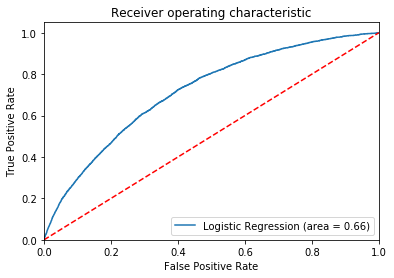

In [98]:
# for C=0.5
logreg2 = LogisticRegression(C=0.05,random_state=7)

logreg2.fit(os_data_X, os_data_y)

y_pred11 = logreg2.predict(X_test)

print('Accuracy: ',metrics.accuracy_score(y_test,y_pred11))
print('Classification Report \n',metrics.classification_report(y_test,y_pred11))
print('AUC-ROC: ',roc_auc_score(y_test, y_pred11))

fpr, tpr, thresholds = roc_curve(y_test, logreg2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, y_pred11))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


C:  1
training set score: 0.672731
test set score: 0.676807

C:  100
training set score of lgr100: 0.672664
test set score of lgr100: 0.676513

C:  0.01
training set score of lgr001: 0.672868
test set score of lgr001: 0.676706


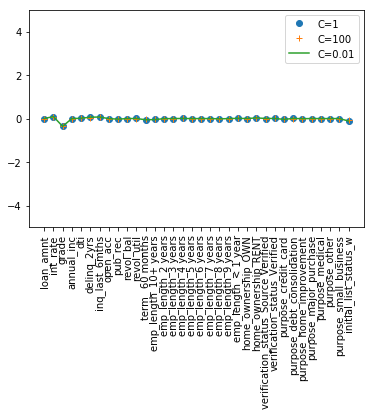

In [99]:
######default C=1#####
lgr=LogisticRegression().fit(os_data_X,os_data_y)
print('\nC: ',1)
print("training set score: %f" % lgr.score(os_data_X, os_data_y))
print("test set score: %f" % lgr.score(X_test, y_test))
 
######increase C to 100#####
lgr100=LogisticRegression(C=100).fit(os_data_X,os_data_y)
print('\nC: ',100)
print("training set score of lgr100: %f" % lgr100.score(os_data_X, os_data_y))
print("test set score of lgr100: %f" % lgr100.score(X_test, y_test))
 
######decrease C to 0.01#####
lgr001=LogisticRegression(C=0.01).fit(os_data_X,os_data_y)
print('\nC: ',0.01)
print("training set score of lgr001: %f" % lgr001.score(os_data_X, os_data_y))
print("test set score of lgr001: %f" % lgr001.score(X_test, y_test))

import matplotlib.pyplot as plt
plt.plot(lgr.coef_.T,'o',label='C=1')
plt.plot(lgr100.coef_.T,'+',label='C=100')
plt.plot(lgr001.coef_.T,'-',label='C=0.01')
plt.xticks(range(os_data_X_df.shape[1]),os_data_X_df.columns,rotation=90)
plt.ylim(-5,5)
#plt.xlim(0,60)
plt.legend()
plt.show()

**Inference**: trying with different C params also gave the same results and on giving class_weights its not helping, infact worsens the results.

## Decision Trees

**checking if sklearn decision tree can be made with out encoding categorical data**  
Theory says that trees do not need encoding.

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [101]:
# keeping the target variable to 1 and 0
y.value_counts()

# creating train test without encoding categorical to numerical
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(x, y, test_size=0.3, random_state=0)

# checking data type of target variable
print('data type of target variable: ',y_train_d.dtype)

data type of target variable:  int32


In [102]:
# trying to make decision tree with above data, no dummy and target in form on 1 and 0
dtree_d = DecisionTreeClassifier()
dtree_d.fit(X_train_d, y_train_d)

ValueError: could not convert string to float: ' 36 months'

**Observation**: we see that in the error that decision tree is expecting all the variables to be of numerical type. So the data should be encoded, contrary to what we expect from the theory of decision tree.

**checking if it is necessary to change the target variable levels from numeric 1 and 0 to other categorical levels like say yes and no while doing calssification** 

In [103]:
# keeping the target variable to 1 and 0
print(y_train.value_counts())

# checking data type of target variable
print('\ndata type of target variable: ',y_train.dtype)

# creating decision tree on train test data with encoding categorical to numerical
X_train.columns

0    269642
1      8016
Name: default, dtype: int64

data type of target variable:  int32


Index(['loan_amnt', 'int_rate', 'grade', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'term_ 60 months', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_medical', 'purpose_other',
       'purpose_small_business', 'initial_list_status_w'],
      dtype='object')

In [104]:
# trying to make decision tree with above data, with dummy and target in form on 1 and 0
dtree_d = DecisionTreeClassifier()
dtree_d.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [105]:
prediction = dtree_d.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,prediction))
print('Classification Report \n',metrics.classification_report(y_test,prediction))

Accuracy:  0.9390068657193038
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97    115680
           1       0.05      0.06      0.05      3317

   micro avg       0.94      0.94      0.94    118997
   macro avg       0.51      0.51      0.51    118997
weighted avg       0.95      0.94      0.94    118997



**Conclusion**: Encoding of categorical data to numerical data is mandatory in sklearn implementation of decision trees.  
Target variable do not need to be in categorical form. They can be 1 and 0.

### Decision Tree with default options on oversampled data with dummy data

In [94]:
# normal Decision Tree with default values
dtree = DecisionTreeClassifier()
dtree.fit(os_data_X, os_data_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
prediction = dtree.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,prediction))
print('Classification Report \n',metrics.classification_report(y_test,prediction))

Accuracy:  0.9382841584241619
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97    115680
           1       0.05      0.07      0.06      3317

   micro avg       0.94      0.94      0.94    118997
   macro avg       0.51      0.52      0.51    118997
weighted avg       0.95      0.94      0.94    118997



In [96]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction)

# same as roc_auc_score
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5158307371055934

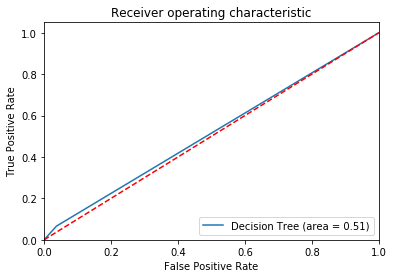

In [109]:
dtree_roc_auc = roc_auc_score(y_test,prediction)
fpr, tpr, thresholds = roc_curve(y_test,prediction)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Tuning Decision Tree

#### Using Manual Plotting

**1. max_depth**  
This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 5 to 32 and plot the training and test auc scores.

In [110]:
max_depths = np.linspace(5, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(os_data_X, os_data_y)
    
    # we are checking on training to see how increasing max_depth leads to overfitting
    train_pred = dt.predict(os_data_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    # on test data
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)


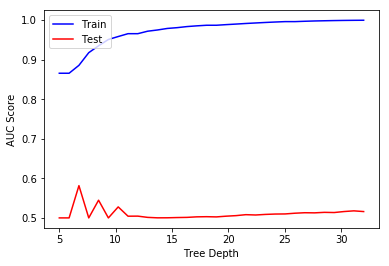

In [111]:
# plotting graph of AUC-ROC for both train and test as we increase max_depth
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('Tree Depth')
plt.show()

**Inference**: We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data  
*max_detpth* near zero seems to give best AUC-ROC score but that is simply underfitting the model. So we will choose the next best performance at **6**.

**2. min_samples_split**  
min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples.

In [97]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(os_data_X, os_data_y)
    train_pred = dt.predict(os_data_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)


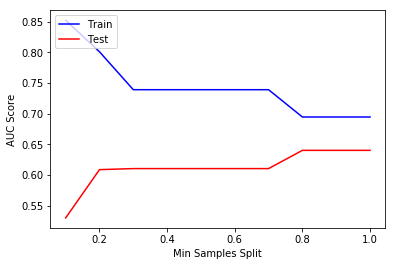

In [98]:
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('Min Samples Split')
plt.show()

**Inference**: We can clearly see that when we consider 100% of the samples at each node, the model cannot learn enough about the data. This is an underfitting case.  
optimumm *min_split_samples* for test data from graph = **0.2**

**3. min_samples_leaf**  
min_samples_leaf is the minimum percentage of total samples at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the terminal node of the tree.

In [99]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(os_data_X, os_data_y)
    train_pred = dt.predict(os_data_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

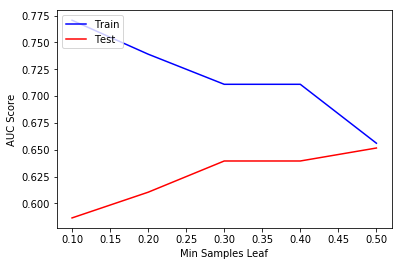

In [100]:
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('Min Samples Leaf')
plt.show()

**Inference**: on train data *min_samples_leaf* = **0.5** or *50%* of the total data seems to give the best AUC-ROC.

**4. max_features**  
max_features represents the number of features to consider when looking for the best split.

In [101]:
max_features = list(range(1,os_data_X.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(os_data_X, os_data_y)
    train_pred = dt.predict(os_data_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

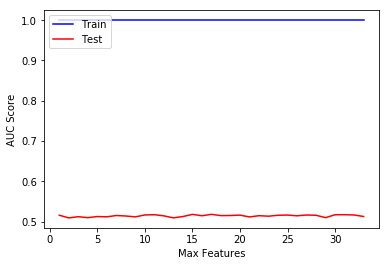

In [102]:
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('Max Features')
plt.show()

**Inference**: no change in performance on either train or test wrt max_features

#### Tuned Decision Tree  
the parameters taken from above *inferences*

Accuracy:  0.6563022597208333
Classificatin Report 
               precision    recall  f1-score   support

           0       0.98      0.66      0.79    115680
           1       0.05      0.65      0.09      3317

   micro avg       0.66      0.66      0.66    118997
   macro avg       0.52      0.65      0.44    118997
weighted avg       0.96      0.66      0.77    118997



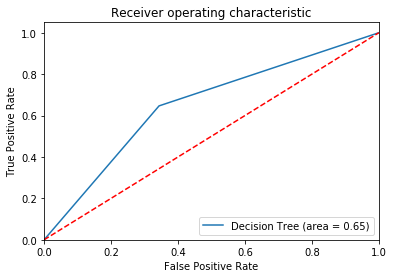

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier(min_samples_split=0.2,max_depth=6,min_samples_leaf=0.5).fit(os_data_X, os_data_y)
prediction = dtree.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,prediction))
print('Classificatin Report \n',metrics.classification_report(y_test,prediction))
dtree_roc_auc = roc_auc_score(y_test,prediction)
fpr, tpr, thresholds = roc_curve(y_test,prediction)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Inference**: Improvement in AUC-ROC from **0.52** for Default Decision Tree Model to **0.65** for Tunes Decision Tree Model.

## Random Forest  
An example of Ensemble Modelling (specifically Bagging) in Decision Trees

In [85]:
from sklearn.ensemble import RandomForestClassifier

### Random Forest Model without tuning i.e. with default values and oversampled data

c:\users\aviral agarwal\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  0.971915258367858
Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    115680
           1       0.00      0.00      0.00      3317

   micro avg       0.97      0.97      0.97    118997
   macro avg       0.49      0.50      0.49    118997
weighted avg       0.95      0.97      0.96    118997



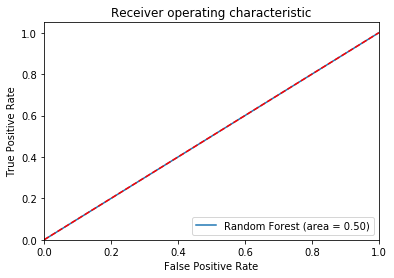

In [105]:
rf = RandomForestClassifier().fit(os_data_X, os_data_y)

pred_rf = rf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,pred_rf))
print('Classification Report \n',metrics.classification_report(y_test,pred_rf))

# plotting ROC-AUC
rf_roc_auc = roc_auc_score(y_test,pred_rf)
fpr, tpr, thresholds = roc_curve(y_test,pred_rf)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Inference**: Interesting, yet believable, to be observed that Random Forest Model with *default* options (AUC-ROC=**0.50**) perfermormed a little worse than Decision Tree with *default* options (AUC-ROC=**0.52**).

### Tuning Random Forest

#### Using Manual Plotting

**1. n_estimators**  
n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

In [109]:
n_estimators = [50, 100, 150, 200, 250, 300, 350]
train_results = []
test_results = []
print("Start of n_estimators {0} rf".format(datetime.datetime.now()))
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1,random_state=0).fit(os_data_X, os_data_y)
    
    train_pred = rf.predict(os_data_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

print("End of n_estimators {0} rf".format(datetime.datetime.now()))

Start of n_estimators 2019-05-11 14:05:08.836510 rf
End of n_estimators 2019-05-11 14:28:09.885323 rf


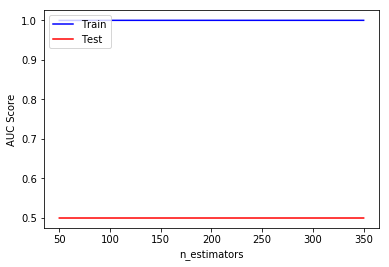

In [110]:
plt.plot(n_estimators, train_results, 'b', label='Train AUC')
plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('n_estimators')
plt.show()

**Inference**: changing no. of estimators has no impact on performanc of the model.

**2. max_depth**  
same as Decision Tree

Start of max_depths 2019-05-11 14:34:29.876088 rf
End of max_depths 2019-05-11 15:14:38.368136 rf


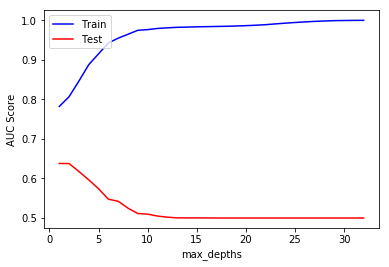

In [113]:
warnings.simplefilter(action='ignore', category=FutureWarning) 

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

print("Start of max_depths {0} rf".format(datetime.datetime.now()))

for max_depth in max_depths:
    rf = RandomForestClassifier(n_estimators=100,max_depth=max_depth, n_jobs=-1,random_state=0).fit(os_data_X, os_data_y)
    train_pred = rf.predict(os_data_X)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

print("End of max_depths {0} rf".format(datetime.datetime.now()))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('max_depths')
plt.show()

**3. min_samples_split**    
same as decision tree

Start of min_samples_split 2019-05-11 15:14:38.698909 rf
Start of min_samples_split 2019-05-11 15:17:48.393308 rf


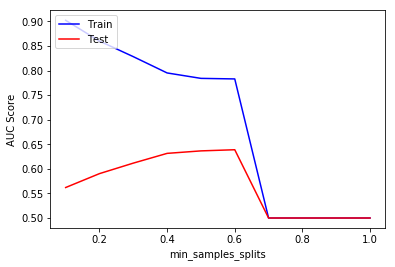

In [114]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

print("Start of min_samples_split {0} rf".format(datetime.datetime.now()))

for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(n_estimators=100,min_samples_split=min_samples_split, n_jobs=-1,random_state=0).fit(os_data_X, os_data_y)
    train_pred = rf.predict(os_data_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

print("Start of min_samples_split {0} rf".format(datetime.datetime.now()))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('min_samples_splits')
plt.show()

**4. min_samples_leaf**  
same as decision tree

Start of min_samples_leaf 2019-05-11 15:17:48.580960 rf
Start of min_samples_leaf 2019-05-11 15:19:00.890520 rf


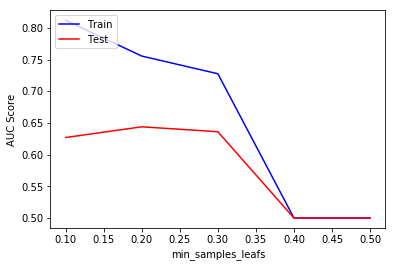

In [115]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

print("Start of min_samples_leaf {0} rf".format(datetime.datetime.now()))

for min_samples_leaf  in min_samples_leafs:
    rf = RandomForestClassifier(n_estimators=100,min_samples_leaf=min_samples_leaf, n_jobs=-1,random_state=0).fit(os_data_X, os_data_y)
    train_pred = rf.predict(os_data_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)

    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
print("Start of min_samples_leaf {0} rf".format(datetime.datetime.now()))
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('min_samples_leafs')
plt.show()

**5. max_features**  
same as decision tree

In [89]:
# atleast 30% of the total features=0.4*75=22.5
max_features = list(range(20,os_data_X.shape[1]))
train_results = []
test_results = []

print("Start of max_features {0} rf".format(datetime.datetime.now()))

for max_feature in max_features:
    rf = RandomForestClassifier(n_estimators=100,max_features=max_feature, n_jobs=-1,random_state=0).fit(os_data_X, os_data_y)
    train_pred = rf.predict(os_data_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
   
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
print("End of max_features {0} rf".format(datetime.datetime.now()))

Start of max_features 2019-05-11 16:23:55.987961 rf
End of max_features 2019-05-11 17:33:38.220401 rf


NameError: name 'min_samples_splits' is not defined

End of max_features 2019-05-11 17:38:50.613319 rf


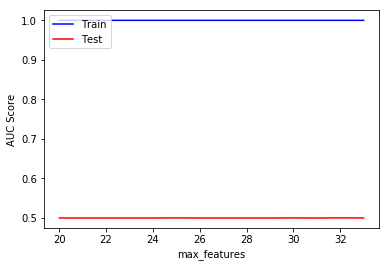

In [90]:

plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('max_features')
plt.show()

### Using GridSearchCV for finding optimal Parameters

In [91]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on above results
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,4,5],
    'max_features': ['sqrt','log2','auto'],
    'min_samples_leaf': [0.20,0.25,0.30],
    'min_samples_split': [0.5,0.6],
    'n_estimators': [50,100]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
#This will try out 1 * 3 * 3 * 3 * 2 * 2 =  108 combinations of settings. 
#We can fit the model, display the best hyperparameters, and evaluate performance:

Start of GridSearchCV 2019-05-11 17:50:53.532934
End of GridSearchCV 2019-05-11 17:50:53.540423


In [92]:
# Fit the grid search to the data
print("Start of GridSearchCV Fitting {0}".format(datetime.datetime.now()))
grid_search.fit(os_data_X, os_data_y)
print("End of GridSearchCV Fitting {0}".format(datetime.datetime.now()))
grid_search.best_params_

Start of GridSearchCV Fitting 2019-05-11 17:51:07.448639
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 49.3min finished


End of GridSearchCV Fitting 2019-05-11 18:40:41.543625


{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 0.2,
 'min_samples_split': 0.6,
 'n_estimators': 50}

### Tuned Random Forest

Accuracy:  0.7488592149381917
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.76      0.85    115680
           1       0.06      0.52      0.10      3317

   micro avg       0.75      0.75      0.75    118997
   macro avg       0.52      0.64      0.48    118997
weighted avg       0.96      0.75      0.83    118997



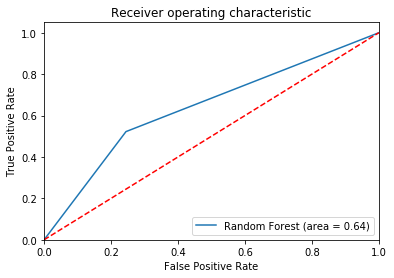

In [100]:
# Tuned Random Forest 1
rf_tuned = RandomForestClassifier(n_estimators=50,max_features='auto',min_samples_leaf=0.2,min_samples_split=0.6, max_depth=4,n_jobs=-1,random_state=0)
rf_tuned.fit(os_data_X, os_data_y)
y_pred = rf_tuned.predict(X_test)

rf_roc_auc = roc_auc_score(y_test,y_pred)
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('Classification Report \n',metrics.classification_report(y_test,y_pred))
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

c:\users\aviral agarwal\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  0.7443885139961511
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.75      0.85    115680
           1       0.06      0.53      0.10      3317

   micro avg       0.74      0.74      0.74    118997
   macro avg       0.52      0.64      0.48    118997
weighted avg       0.96      0.74      0.83    118997



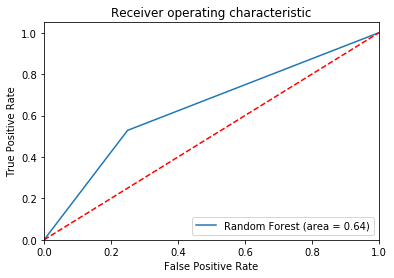

In [99]:
# Tuned Random Forest 2
rf_tuned = RandomForestClassifier(max_features=25,min_samples_leaf=0.2,min_samples_split=0.5, max_depth=3,n_jobs=-1,random_state=0)
rf_tuned.fit(os_data_X, os_data_y)
y_pred = rf_tuned.predict(X_test)
rf_roc_auc = roc_auc_score(y_test,y_pred)
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('Classification Report \n',metrics.classification_report(y_test,y_pred))
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Inferences

1. Logistic Regression: Accuracy-0.65 , ROC-0.65
2. Decision Tree:       Accuracy-0.65 , ROC-0.65
3. Random Forest:       Accuracy-0.74 , ROC-0.63
    
##### We could see the best results we got were from Random Forest